In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", message="Could not find the number of physical cores")


In [11]:
# Step 1: Load the data
filepath = "C:/Users/Patrick Yau/Documents/GitHub/Project-4/Resources/road_accdients_data.csv"
df = pd.read_csv(filepath)
df.head()

,Accident_Index,Accident Date,Month,Day_of_Week,Year,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,01/01/2021,Jan,Thursday,2021,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,05/01/2021,Jan,Monday,2021,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,04/01/2021,Jan,Sunday,2021,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,05/01/2021,Jan,Monday,2021,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,06/01/2021,Jan,Tuesday,2021,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


In [13]:
df.columns


Index(['Accident_Index', 'Accident Date', 'Month', 'Day_of_Week', 'Year',
       'Junction_Control', 'Junction_Detail', 'Accident_Severity', 'Latitude',
       'Light_Conditions', 'Local_Authority_(District)', 'Carriageway_Hazards',
       'Longitude', 'Number_of_Casualties', 'Number_of_Vehicles',
       'Police_Force', 'Road_Surface_Conditions', 'Road_Type', 'Speed_limit',
       'Time', 'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')

In [15]:
# Step 2: Select useful features

features = [
    'Day_of_Week',
    'Time',
    'Road_Surface_Conditions',
    'Light_Conditions',
    'Weather_Conditions',
    'Urban_or_Rural_Area',
    'Vehicle_Type',
    'Speed_limit',
    'Junction_Detail'
]

target = 'Accident_Severity'

df = df[features + [target]]


In [17]:
# Step 3: Clean and transform the data

# ✅ Fill missing values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna('Unknown')
    else:
        df[col] = df[col].fillna(df[col].median())


In [19]:
print(df.columns.tolist())


['Day_of_Week', 'Time', 'Road_Surface_Conditions', 'Light_Conditions', 'Weather_Conditions', 'Urban_or_Rural_Area', 'Vehicle_Type', 'Speed_limit', 'Junction_Detail', 'Accident_Severity']


In [21]:
# Step 4: Encode categorical variables

from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [22]:
# Step 5: Train-test split

from sklearn.model_selection import train_test_split

X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)


In [25]:
# Step 6: Classification model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[    4    38   264]
 [   19   184  2411]
 [   91   975 16014]]
              precision    recall  f1-score   support

           0       0.04      0.01      0.02       306
           1       0.15      0.07      0.10      2614
           2       0.86      0.94      0.90     17080

    accuracy                           0.81     20000
   macro avg       0.35      0.34      0.34     20000
weighted avg       0.75      0.81      0.78     20000



Classification Report:
              precision    recall  f1-score   support

           0       0.04      0.01      0.02       306
           1       0.15      0.07      0.10      2614
           2       0.86      0.94      0.90     17080

    accuracy                           0.81     20000
   macro avg       0.35      0.34      0.34     20000
weighted avg       0.75      0.81      0.78     20000



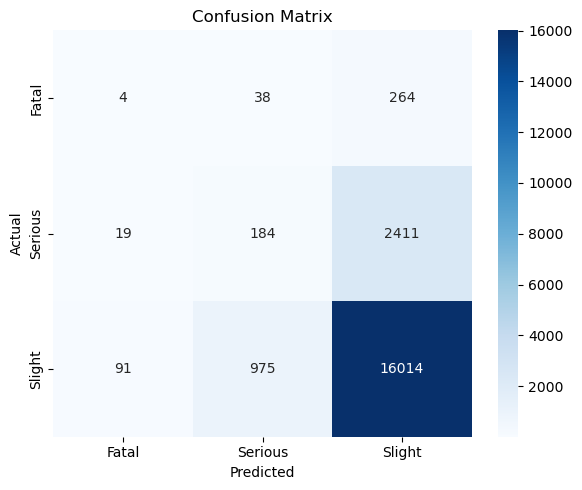

In [26]:
# PART 1: Train Classifier and Visualize Performance

# Code: Train & Evaluate Model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoders['Accident_Severity'].classes_,
            yticklabels=label_encoders['Accident_Severity'].classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


Classification Report:
              precision    recall  f1-score   support

       Fatal       0.27      0.11      0.15       297
     Serious       0.91      0.97      0.94      2623

    accuracy                           0.88      2920
   macro avg       0.59      0.54      0.54      2920
weighted avg       0.84      0.88      0.86      2920



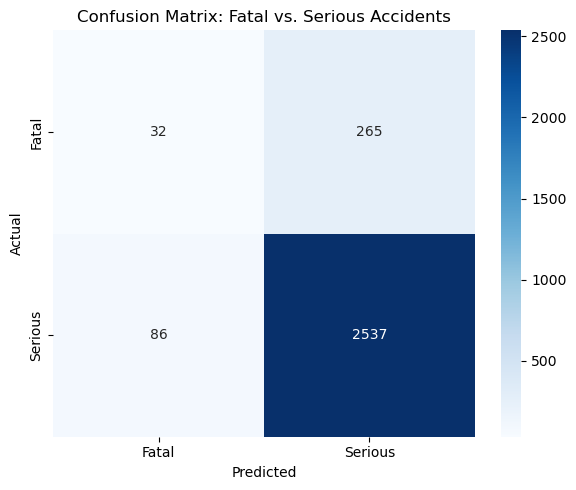

In [28]:
# Required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# ----------------------
# Load Data

df = pd.read_csv(filepath)

# ----------------------
# Filter Data: Only Fatal & Serious Accidents
# ----------------------
df = df[df['Accident_Severity'].isin(['Fatal', 'Serious'])]

# ----------------------
# Prepare Features (X) & Target (y)
# ----------------------
features = ['Latitude', 'Longitude', 'Speed_limit', 'Road_Type', 'Weather_Conditions']  # Adjust features if needed
X = df[features]
y = df['Accident_Severity']

# Encode categorical variables
X = pd.get_dummies(X)  # Convert categorical columns into numerical format

# ----------------------
# Split Data for Training & Testing
# ----------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------------
# Train Random Forest Classifier
# ----------------------
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# ----------------------
# Evaluate Model Performance
# ----------------------
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fatal', 'Serious'],
            yticklabels=['Fatal', 'Serious'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix: Fatal vs. Serious Accidents")
plt.tight_layout()
plt.show()

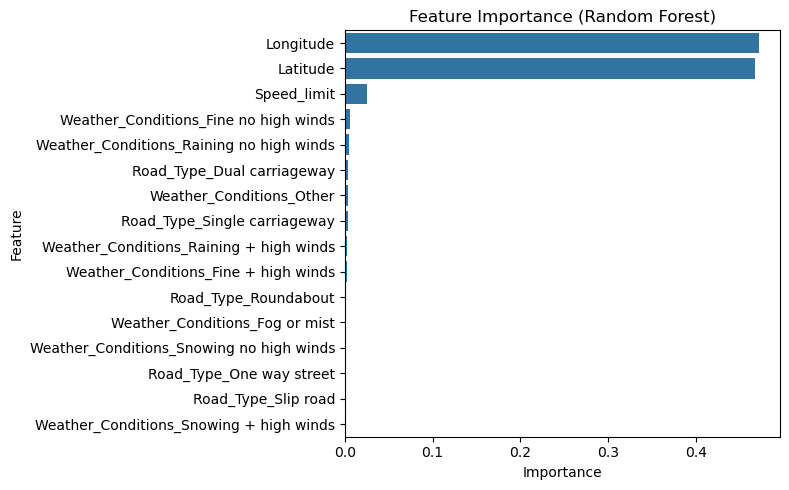

In [29]:
# Feature Importance Plot: This shows which features the model relied on most.

import numpy as np

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=importances[indices], y=feature_names[indices])
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [30]:
df.columns


Index(['Accident_Index', 'Accident Date', 'Month', 'Day_of_Week', 'Year',
       'Junction_Control', 'Junction_Detail', 'Accident_Severity', 'Latitude',
       'Light_Conditions', 'Local_Authority_(District)', 'Carriageway_Hazards',
       'Longitude', 'Number_of_Casualties', 'Number_of_Vehicles',
       'Police_Force', 'Road_Surface_Conditions', 'Road_Type', 'Speed_limit',
       'Time', 'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')

In [31]:
# PART 2: Clustering Accident Hotspots
# Clustering & Mapping
# Required Libraries
import pandas as pd
import folium
from sklearn.cluster import DBSCAN
from folium.plugins import HeatMap
import seaborn as sns
import re
from datetime import datetime

# ----------------------
# Load & Clean Data
# ----------------------

df = pd.read_csv(filepath)

# Filter for Fatal & Serious Accidents
df = df[df['Accident_Severity'].isin(['Fatal', 'Serious'])].dropna(subset=['Latitude', 'Longitude', 'Time'])

# ----------------------
# Parse Time → Extract Hour Safely
# ----------------------
def extract_hour_safe(time_str):
    if isinstance(time_str, str):  # Ensure input is a string
        time_str = time_str.strip()
        
        # Match common time formats and extract HH:MM
        if re.match(r'^\d{1,2}:\d{2}(:\d{2})?$', time_str):  # Supports 'HH:MM' and 'HH:MM:SS'
            try:
                return datetime.strptime(time_str[:5], '%H:%M').hour  # Extract HH:MM safely
            except ValueError:
                return None  # Handle invalid formats
        
    return None  # Return None if input is not valid

df['Hour'] = df['Time'].apply(extract_hour_safe)

# Remove rows with missing or invalid hours
df.dropna(subset=['Hour'], inplace=True)
df['Hour'] = df['Hour'].astype(int)  # Ensure integer format

# Classify accidents by time of day
df['Period'] = df['Hour'].apply(lambda x: 'Night' if x < 6 or x > 20 else 'Day')

# ----------------------
# Apply DBSCAN Clustering
# ----------------------
dbscan = DBSCAN(eps=0.03, min_samples=10)  # Adjust sensitivity
df['Cluster'] = dbscan.fit_predict(df[['Latitude', 'Longitude']])

# ----------------------
# Assign Colors Based on Severity
# ----------------------
color_map = {'Fatal': 'red', 'Serious': 'orange'}

# ----------------------
# Initialize Folium Map
# ----------------------
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
accident_map = folium.Map(location=map_center, zoom_start=6)

# ----------------------
# Add Clustered Accidents with Severity-Based Colors
# ----------------------
for _, row in df.iterrows():
    color = color_map[row['Accident_Severity']]  # Assign color by severity
    tooltip = f"Severity: {row['Accident_Severity']}<br>Vehicles: {row['Number_of_Vehicles']}<br>Weather: {row['Weather_Conditions']}<br>Time: {row['Time']} ({row['Period']})"

    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=6,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        tooltip=tooltip
    ).add_to(accident_map)

# ----------------------
# Add Heatmap Layer
# ----------------------
heat_data = df[['Latitude', 'Longitude']].values.tolist()
HeatMap(heat_data, radius=12, blur=15, gradient={0.4: 'orange', 0.65: 'red'}).add_to(accident_map)

# ----------------------
# Add Custom Legend
# ----------------------
legend_html = '''  
<div style="
    position: fixed;  
    bottom: 20px; left: 20px; width: 240px; height: 120px;  
    background-color: white; border:2px solid gray; z-index:9999; font-size:14px;
    padding: 10px;">  
<b>Legend:</b><br>  
<span style="color:red;">●</span> Fatal Accidents<br>  
<span style="color:orange;">●</span> Serious Accidents<br>  
</div>  
'''  
accident_map.get_root().html.add_child(folium.Element(legend_html))

# ----------------------
# Save Map
# ----------------------
accident_map.save("fatal_serious_accident_hotspots.html")
print("Map saved as 'fatal_serious_accident_hotspots.html'")

# ----------------------
# Brief Analysis Output
# ----------------------
print("\n--- Accident Severity Breakdown ---")
print(df['Accident_Severity'].value_counts())
print("\nTotal Clusters Found:", len(df['Cluster'].unique()) - 1)  # Ignore noise points (-1)


ModuleNotFoundError: No module named 'folium'

In [ ]:
### Part 2(b) - Road Type-Based Clustering

# Required Libraries
import pandas as pd
import folium
from sklearn.cluster import DBSCAN
from folium.plugins import HeatMap
import seaborn as sns
import re
from datetime import datetime

# ----------------------
# Load & Clean Data

df = pd.read_csv(filepath)

# Filter necessary columns & remove missing values
columns_to_keep = ['Accident_Index', 'Latitude', 'Longitude', 'Time', 'Accident_Severity', 'Road_Type']
df = df[columns_to_keep].dropna()

# ----------------------
# Extract Hour from Time Safely
# ----------------------
def extract_hour_safe(time_str):
    if isinstance(time_str, str):  # Ensure input is a string
        time_str = time_str.strip()
        
        # Match common time formats and extract HH:MM
        if re.match(r'^\d{1,2}:\d{2}(:\d{2})?$', time_str):  # Supports 'HH:MM' and 'HH:MM:SS'
            try:
                return datetime.strptime(time_str[:5], '%H:%M').hour  # Extract HH:MM safely
            except ValueError:
                return None  # Handle invalid formats
        
    return None  # Return None if input is not valid

df['Hour'] = df['Time'].apply(extract_hour_safe)

# Remove rows with missing or invalid hours
df.dropna(subset=['Hour'], inplace=True)
df['Hour'] = df['Hour'].astype(int)  # Ensure integer format

# ----------------------
# Clustering Accidents By Road Type
# ----------------------
cluster_results = []
cluster_id = 0
road_types = df['Road_Type'].unique()
road_accident_counts = df['Road_Type'].value_counts().to_dict()  # Count accidents per road type

for road in road_types:
    sub_df = df[df['Road_Type'] == road]
    
    if len(sub_df) >= 10:  # Ensure enough data points for clustering
        coords = sub_df[['Latitude', 'Longitude']].values
        db = DBSCAN(eps=0.03, min_samples=10).fit(coords)
        labels = db.labels_
        
        sub_df = sub_df.copy()
        sub_df['Cluster'] = [
            cluster_id + label if label != -1 else -1 for label in labels
        ]
        cluster_id += len(set(labels)) - (1 if -1 in labels else 0)
        
        cluster_results.append(sub_df)

# Combine all clustered results
df_clustered = pd.concat(cluster_results, ignore_index=True)

# ----------------------
# Assign Colors to Road Type Clusters
# ----------------------
valid_clusters = df_clustered[df_clustered['Cluster'] != -1]['Cluster'].unique()
palette = sns.color_palette("husl", len(road_types))  # Assign distinct colors per road type
color_map = {road_type: f"#{int(r*255):02x}{int(g*255):02x}{int(b*255):02x}"  
             for road_type, (r, g, b) in zip(road_types, palette)}

# ----------------------
# Initialize Folium Map
# ----------------------
map_center = [df_clustered['Latitude'].mean(), df_clustered['Longitude'].mean()]
accident_map = folium.Map(location=map_center, zoom_start=6)

# ----------------------
# Add Clustered Accidents with Road Type Highlighting
# ----------------------
for _, row in df_clustered.iterrows():
    road_type = row['Road_Type']
    color = color_map.get(road_type, 'gray')  # Assign color per road type
    marker_size = min(10, road_accident_counts[road_type] // 50 + 4)  # Scale size by accident frequency
    
    tooltip = (  
        f"Road Type: {road_type}<br>"
        f"Total Accidents: {road_accident_counts[road_type]}<br>"
        f"Severity: {row['Accident_Severity']}<br>"
        f"Time: {row['Time']} ({row['Hour']} hrs)"
    )
    
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=marker_size,  # Scale cluster size by accident frequency
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        tooltip=tooltip
    ).add_to(accident_map)

# ----------------------
# Add Heatmap Layer to Highlight Severe Spots
# ----------------------
heat_data = df_clustered[['Latitude', 'Longitude']].values.tolist()
HeatMap(heat_data, radius=12, blur=15, gradient={0.4: 'blue', 0.65: 'red'}).add_to(accident_map)

# ----------------------
# Add Accident Count Summary to Map
# ----------------------
summary_html = "<div style='position: fixed; bottom: 20px; right: 20px; width: 250px; height: auto; background-color: white; border:2px solid gray; z-index:9999; font-size:14px; padding: 10px;'>"
summary_html += "<b>Accidents by Road Type:</b><br>"
for road_type, count in road_accident_counts.items():
    summary_html += f"<span style='color:{color_map[road_type]};'>●</span> {road_type}: {count} accidents<br>"
summary_html += "</div>"

accident_map.get_root().html.add_child(folium.Element(summary_html))

# ----------------------
# Add Road Type Color Legend
# ----------------------
legend_html = "<div style='position: fixed; bottom: 20px; left: 20px; width: 250px; height: auto; background-color: white; border:2px solid gray; z-index:9999; font-size:14px; padding: 10px;'>"
legend_html += "<b>Legend: Road Type Colors</b><br>"
for road_type in road_types:
    legend_html += f"<span style='color:{color_map[road_type]};'>●</span> {road_type}<br>"
legend_html += "</div>"

accident_map.get_root().html.add_child(folium.Element(legend_html))

# ----------------------
# Save Map
# ----------------------
accident_map.save("road_type_clustered_hotspots.html")
print("Map saved as 'road_type_clustered_hotspots.html'")

# ----------------------
# Brief Analysis Output
# ----------------------
print("\n--- Clustered Accident Breakdown ---")
print(df_clustered['Road_Type'].value_counts())
print("\nTotal Clusters Found:", len(df_clustered['Cluster'].unique()) - 1)  # Ignore noise points (-1)

In [ ]:
# PART 3: Analyze Patterns and Relationships
# Road Accident Dashboard using Panel and hvPlot

import pandas as pd
import panel as pn
import hvplot.pandas
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

pn.extension('tabulator')

# Load dataset
filepath = "C:/Users/shara/Desktop/CLASSES/Project 4 due June10,25/Resources/road_accdients_data.csv"
df = pd.read_csv(filepath)

# Preprocessing
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce').dt.hour
df = df.dropna(subset=['Latitude', 'Longitude', 'Hour', 'Number_of_Casualties'])

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna('Unknown')

for col in df.select_dtypes(include='number').columns:
    df[col] = df[col].fillna(df[col].median())

# Modeling
features = ['Hour', 'Speed_limit', 'Urban_or_Rural_Area', 'Road_Surface_Conditions', 'Weather_Conditions', 'Vehicle_Type']
df_model = df[features + ['Number_of_Casualties']].copy()
df_model = pd.get_dummies(df_model, drop_first=True)

X = df_model.drop(columns='Number_of_Casualties')
y = df_model['Number_of_Casualties']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model_lr = LinearRegression().fit(X_train, y_train)
model_gbr = GradientBoostingRegressor().fit(X_train, y_train)

# Predictions
df['LR_Predicted'] = model_lr.predict(X)
df['GBR_Predicted'] = model_gbr.predict(X)

# Evaluation (on test set)
lr_rmse = np.sqrt(mean_squared_error(y_test, model_lr.predict(X_test)))
gbr_rmse = np.sqrt(mean_squared_error(y_test, model_gbr.predict(X_test)))
rmse_text = pn.pane.Markdown(f"""
### Model Evaluation (RMSE on Test Set)
- **Linear Regression**: {lr_rmse:.4f}  
- **Gradient Boosting Regressor**: {gbr_rmse:.4f}
""")

# Widgets
area_filter = pn.widgets.Select(name='Urban or Rural', options=sorted(df['Urban_or_Rural_Area'].unique()))
weather_filter = pn.widgets.Select(name='Weather Condition', options=sorted(df['Weather_Conditions'].unique()))
hour_slider = pn.widgets.IntSlider(name='Hour of Day', start=0, end=23, step=1)
model_selector = pn.widgets.RadioButtonGroup(name='Model Displayed', options=['Both', 'Linear Regression', 'Gradient Boosting'], button_type='primary')

# Interactive accident map
@pn.depends(area_filter, weather_filter, hour_slider)
def update_plot(area, weather, hour):
    filtered = df[(df['Urban_or_Rural_Area'] == area) &
                  (df['Weather_Conditions'] == weather) &
                  (df['Hour'] == hour)]
    return filtered.hvplot.scatter(
        x='Longitude', y='Latitude', geo=True, tiles='OSM',
        color='Number_of_Casualties', size=100, cmap='Inferno',
        title='Accidents Map (Filtered)', height=500, width=700,
        hover_cols=['Accident_Severity', 'Vehicle_Type'],
        clabel='Casualties', clim=(df['Number_of_Casualties'].min(), df['Number_of_Casualties'].max())
    )

# Line plot for actual vs predicted
@pn.depends(area_filter, model_selector)
def line_plot(area, model):
    plot_df = df[df['Urban_or_Rural_Area'] == area]
    plot_df = plot_df.groupby('Hour')[['Number_of_Casualties', 'LR_Predicted', 'GBR_Predicted']].mean().reset_index()

    if model == 'Linear Regression':
        y_cols = ['Number_of_Casualties', 'LR_Predicted']
    elif model == 'Gradient Boosting':
        y_cols = ['Number_of_Casualties', 'GBR_Predicted']
    else:
        y_cols = ['Number_of_Casualties', 'LR_Predicted', 'GBR_Predicted']

    return plot_df.hvplot.line(
        x='Hour', y=y_cols, title=f'Casualties vs Predicted ({area})',
        height=400, width=700, line_width=3
    )

# Layout
dashboard = pn.Column(
    "# UK Road Accidents Interactive Dashboard",
    pn.Row(area_filter, weather_filter, hour_slider),
    update_plot,
    pn.Spacer(height=20),
    pn.Row(model_selector),
    line_plot,
    pn.Spacer(height=20),
    rmse_text
)

# Serve the dashboard
dashboard.servable()



In [ ]:
import panel as pn
pn.extension()

text = pn.pane.Markdown("""
### Visual Analysis:

- **Gradient Boosting Regressor (GBR)** follows the actual values more closely and responds better to **peaks and dips**.
- **Linear Regression (LR)** produces a relatively **flat, smoother line**, which is typical of linear models that struggle to capture **non-linear patterns**.
- Especially in **early hours (6–9)** and **later hours (20–23)**, GBR aligns more accurately with actual values than LR.

---

### Conclusion:

**Gradient Boosting Regressor (GBR)** performs better than **Linear Regression (LR)** in predicting the number of casualties across the hours of the day for **Rural areas**.

This is expected because:
- GBR can model **non-linear relationships** and **feature interactions**.
- Linear models lack this flexibility and perform poorly on **complex datasets** like traffic accidents.

""")

text
